In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
import pandas as pd
from numpy.random import uniform
import glob
%matplotlib inline
import re
# %matplotlib notebook

In [3]:
location = "/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_without_strengthen/"
folder_list = glob.glob(pathname=location + "*_")

In [4]:
location = folder_list[0] + "/simulation/0/0/"
i = 0

In [2]:
def read(location):
    file = "lipid.dat"
    lipid = pd.read_csv(location+file)
    lipid.columns = lipid.columns.str.strip()

    file = "energy.dat"
    energy = pd.read_csv(location+file)
    energy.columns = energy.columns.str.strip()
    file = "addforce.dat"
    dis = pd.read_csv(location+file)
    dis.columns = dis.columns.str.strip()
#     remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
    file = "rgs.dat"
    rgs = pd.read_csv(location+file)
    rgs.columns = rgs.columns.str.strip()
    file = "wham.dat"
    wham = pd.read_csv(location+file)
    wham.columns = wham.columns.str.strip()
    remove_columns = ['Rg', 'Tc']
    wham = wham.drop(remove_columns, axis=1)
    data = wham.merge(rgs, how='inner', left_on=["Steps"], right_on=["Steps"]).\
        merge(dis, how='inner', left_on=["Steps"], right_on=["Steps"]).\
        merge(energy, how='inner', left_on=["Steps"], right_on=["Steps"]).\
        merge(lipid, how='inner', left_on=["Steps"], right_on=["Steps"])
    data = data.assign(TotalE = data.Energy + data.Lipid)
    return data

In [8]:
location = "/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/0/0/"

In [10]:
location = "/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_"

In [13]:
glob.glob(location+"/simulation/*")

['/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/17',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/0',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/5',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/19',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/6',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/18',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/15',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/9',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/7',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation/8',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_/simulation

In [23]:
location = "/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling"
test = "pre"

In [24]:
os.path.join(location, test)

'/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pre'

In [20]:
glob.glob("/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/*_")

['/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_1.0_',
 '/Users/weilu/Research/server/jan_2018/week_of_jan29/pulling/pressure_0.6_']

In [9]:
read(location)

,Steps,Qw,Energy,rg1,rg2,rg3,rg4,rg5,rg6,rg_all,...,Lipid7,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE
0,4000,0.605523,-706.089225,2.971333,2.506001,2.989076,2.505703,3.127377,2.928280,17.027770,...,-1.314062e+00,-7.191582e-01,2.063945e-01,-1.261580e+00,3.844211e-01,-1.624016e+00,-1.099269e+00,-1.654170e+00,-1.521931e+00,-715.505150
1,8000,0.521618,-576.526478,4.427032,2.652856,2.779439,4.056813,2.643611,4.861577,21.421328,...,-1.994911e+00,-1.835687e+00,1.010438e-01,-1.457990e+00,8.516464e-01,-2.025393e+00,-1.771873e+00,-2.095627e+00,-1.978071e-01,-584.823534
2,12000,0.434210,-531.921294,3.085481,3.139975,2.603010,2.806233,2.000906,4.075208,17.710813,...,-1.578409e+00,-1.862330e+00,4.115545e-01,-1.365978e+00,1.433982e-01,-2.049466e+00,-1.457151e+00,-2.146032e+00,7.825909e-02,-541.065596
3,16000,0.392817,-523.464047,4.869685,4.354001,2.148360,2.894114,2.937320,4.762745,21.966224,...,-1.714313e+00,-1.447852e+00,1.520573e-01,-1.623861e+00,2.656447e-01,-2.097240e+00,-1.809386e+00,-2.111353e+00,-1.428096e+00,-535.639692
4,20000,0.268171,-532.780824,5.904846,5.554420,3.527865,2.606776,2.179527,3.919218,23.692652,...,-1.337142e+00,-1.465566e+00,5.426140e-01,-1.408712e+00,7.290164e-01,-1.731467e+00,-7.473931e-01,-1.823134e+00,8.001810e-01,-540.254506
5,24000,0.224002,-483.819315,7.465344,3.589320,2.032671,2.735016,2.781180,3.777651,22.381181,...,-1.582437e+00,-3.091500e-01,6.720490e-01,-1.575209e+00,5.449492e-01,-1.421398e+00,-9.158980e-01,-1.171139e+00,-1.703539e-01,-490.568577
6,28000,0.206016,-470.742749,10.485480,6.799943,2.143892,4.104524,2.421759,3.421639,29.377237,...,-5.566743e-01,-1.531842e-01,9.236959e-01,-1.468587e+00,7.040467e-01,-1.509538e+00,-1.700736e+00,-2.323514e+00,-6.658174e-02,-477.697485
7,32000,0.214597,-442.097919,10.482745,6.570905,3.069912,3.225368,1.988731,6.401304,31.738965,...,2.053859e-01,1.690645e-01,7.195497e-01,-1.349142e+00,5.931442e-01,-1.231893e+00,-1.000315e+00,-1.670030e+00,5.662274e-01,-445.359742
8,36000,0.205102,-450.193016,0.009245,10.973593,3.941796,1.694883,2.475972,4.380391,23.475880,...,2.825598e-01,-6.579399e-01,2.603111e-01,-1.384816e+00,-9.132165e-02,-1.355693e+00,-1.618602e+00,-1.626969e+00,7.510265e-01,-454.996062
9,40000,0.178305,-499.645211,1.117327,0.011825,4.016656,3.783312,2.495777,3.608206,15.033103,...,8.244950e-03,3.024264e-02,-6.287494e-06,-1.716921e+00,1.000652e-01,-1.860669e+00,-1.209914e+00,-2.117613e+00,7.652931e-01,-505.643790


In [11]:
pre = "/Users/weilu/Research/server/nov_2017/20nov/force_ramp/"
glob.glob(pre+"*_")

['/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.4_memb_k_2_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.1_memb_k_1_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.2_memb_k_0_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.0_memb_k_2_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.2_memb_k_4_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.4_memb_k_8_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.4_memb_k_4_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.8_memb_k_2_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.8_memb_k_4_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.3_memb_k_0_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.2_memb_k_2_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.8_memb_k_8_',
 '/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.8_memb_k_1_',
 '/Users/wei

In [59]:
test = "/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.4_memb_k_1_"

In [62]:
test.split("/")[-1].split("_")

['rg', '0.4', 'memb', 'k', '1', '']

In [51]:
print(re.findall(r'\d+', "11"))

['11']


In [54]:
os.path.join("/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.4_memb_k_2_", "test")

'/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.4_memb_k_2_/test'

In [40]:
os.listdir(path)

['0', '5', '6', 'test_11', '9', '7', '8', '2', '1', '4', '11_test', '11', '3']

In [63]:
pre

'/Users/weilu/Research/server/nov_2017/20nov/force_ramp/'

In [58]:
location = "/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.0_memb_k_1_/simulation"
glob.glob(location + "[0-9]")
run_list = [f for f in os.listdir(location) if re.search(r'^\d+$', f)]
for f in res:
    print(f)

0
5
6
9
7
8
2
1
4
3


In [64]:
def read_data(pre):
    folder_list = glob.glob(pre+"*_")
    all_data_list = []
    for folder in folder_list:
        print(folder)
        location = os.path.join(folder, "simulation")
        run_list = [f for f in os.listdir(location) if re.search(r'^\d+$', f)]
        for i in run_list:
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
            _,rg,_,_,memb,_ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp, rg=rg, memb=memb)
            all_data_list.append(data)
    data = pd.concat(all_data_list)
    data.reset_index(drop=True).to_feather("/Users/weilu/Research/data/pulling/nov23.feather")

In [66]:
def read_data(pre):
    folder_list = glob.glob(pre+"*_")
    all_data_list = []
    for folder in folder_list:
        print(folder)
        location = os.path.join(folder, "simulation")
        run_list = [f for f in os.listdir(location) if re.search(r'^\d+$', f)]
        for i in run_list:
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
            _,rg,_,memb,_ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp, rg=rg, memb=memb)
            all_data_list.append(data)
    data = pd.concat(all_data_list)
     

In [67]:
pre = "/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/"

In [68]:
read_data(pre)

/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.4_mem_0_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.4_mem_4_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.1_mem_0_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.8_mem_8_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.8_mem_1_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.2_mem_8_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.0_mem_2_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.3_mem_2_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.2_mem_2_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.8_mem_4_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.2_mem_4_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.1_mem_2_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.3_mem_1_
/Users/weilu/Research/server/nov_2017/20nov/slower_ramp/rg_0.4_mem_1_
/Users/weilu/Researc

In [8]:
data.columns

Index(['Steps', 'Qw', 'Energy', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'Distance', 'AddedForce', 'Dis12', 'Dis34', 'Dis56', 'Chain',
       'Chi', 'Rama', 'Water', 'Helix', 'AMH-Go', 'Frag_Mem', 'Membrane',
       'VTotal', 'Ebond', 'Epair', 'Rg', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3',
       'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE'],
      dtype='object')

In [7]:
location = "/Users/weilu/Research/server/nov_2017/20nov/force_ramp/rg_0.0_memb_k_0_/simulation/0/0/"
data = read(location)
data

,Steps,Qw,Energy,rg1,rg2,rg3,rg4,rg5,rg6,rg_all,...,Lipid7,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE
0,4000,0.599645,-673.687747,0,0,0,0,0,0,0,...,-2.613143e+00,-2.664568e+00,-1.937897e+00,-2.384366e+00,-2.404665e+00,-1.986632e+00,-2.716796e+00,-2.226672e+00,-2.640122e+00,-717.007513
1,8000,0.562176,-592.244939,0,0,0,0,0,0,0,...,-2.355369e+00,-2.066585e+00,-1.171129e+00,-2.420379e+00,-2.261820e+00,-1.441138e+00,-2.080545e+00,-1.755354e+00,-2.211654e+00,-627.556802
2,12000,0.545994,-583.217063,0,0,0,0,0,0,0,...,-2.713268e+00,-2.477195e+00,-2.022521e+00,-2.430921e+00,-2.164810e+00,-1.317190e+00,-2.564361e+00,-2.161517e+00,-2.538195e+00,-626.103240
3,16000,0.576203,-576.234338,0,0,0,0,0,0,0,...,-2.632716e+00,-2.545546e+00,-2.054824e+00,-2.654586e+00,-2.661304e+00,-2.229399e+00,-2.682591e+00,-1.758258e+00,-2.689982e+00,-623.449567
4,20000,0.588449,-555.260750,0,0,0,0,0,0,0,...,-2.634605e+00,-2.660945e+00,-2.226253e+00,-2.499769e+00,-2.462223e+00,-2.396159e+00,-1.744169e+00,-1.551161e+00,-1.895916e+00,-600.842822
5,24000,0.487176,-565.526400,0,0,0,0,0,0,0,...,-2.432745e+00,-2.628329e+00,-1.642053e+00,-2.696311e+00,-2.476363e+00,-2.298036e+00,-2.705145e+00,-2.141263e+00,-2.310903e+00,-607.641671
6,28000,0.435166,-496.631531,0,0,0,0,0,0,0,...,-2.189096e+00,-2.360557e+00,-3.561515e-01,-2.523794e+00,-2.555132e+00,-1.319571e+00,-2.586414e+00,-1.095986e+00,-2.178119e+00,-525.064448
7,32000,0.458499,-522.491323,0,0,0,0,0,0,0,...,-2.700985e+00,-2.550394e+00,-1.918640e+00,-2.542970e+00,-2.363271e+00,-1.940697e+00,-2.698478e+00,-1.698682e+00,-2.666144e+00,-558.485115
8,36000,0.399905,-553.151596,0,0,0,0,0,0,0,...,-2.300199e+00,-2.708468e+00,-9.434452e-01,-2.471776e+00,-2.519669e+00,-1.424989e+00,-2.650777e+00,-1.589835e+00,-1.044422e+00,-583.252448
9,40000,0.498324,-520.262296,0,0,0,0,0,0,0,...,-2.287263e+00,-2.286505e+00,-1.290002e+00,-2.715502e+00,-2.342327e+00,-1.697892e+00,-2.493116e+00,-1.892396e+00,-2.324125e+00,-562.599497


In [9]:
location = "/Users/weilu/Research/server/nov_2017/06nov/my_configue/study/recompute_offset_0/"
data = read(location)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov08_2.feather")

In [20]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/*_")
    for folder in folder_list:
        print(folder)
        for i in range(5):
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov10_lipid_distance.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.61_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.8_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.8_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_1.6_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.42_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_1.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.58_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_1.0_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.71_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/force_0.3_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_d

In [25]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/rg_*_")
    for folder in folder_list:
        print(folder)
        for i in range(5):
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov10_lipid_distance_rg.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.8_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_1.61_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.11_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_1.6_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.81_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.21_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.41_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/rg_0.1_


In [34]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/pressure_*_")
    for folder in folder_list:
        print(folder)
        for i in range(5):
            data = read(folder + "/simulation/{}/0/".format(i))
            tmp = folder.split("/")[-1]
            pressure = tmp.split("_")[1]
            rg = tmp.split("_")[3]
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp, pressure=pressure, rgsize=rg)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov10_lipid_distance_pressure.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.3_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.4_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.2_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_2.0_rg_0.1_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.3_
/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/pressure_0.8_rg_0.1_


In [36]:
all_data_list = []
location_list = ["next_gen_lipid_distance"]
pre = "/Users/weilu/Research/server/nov_2017/06nov/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/tes*")
    for folder in folder_list:
        print(folder)
        for i in range(2):
            data = read(folder + "/recompute_offset_{}/".format(i))
#             _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, folder=tmp)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov11_lipid_distance.feather")

/Users/weilu/Research/server/nov_2017/06nov/next_gen_lipid_distance/test


In [22]:
all_data_list = []
location_list = ["strengthen_helix_1", "strengthen_helix_1_baseline_without_strengthen"]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/*_")
    for folder in folder_list:
        print(folder)
        for i in range(10):
            data = read(folder + "/simulation/{}/0/".format(i), i)
            tmp = folder.split("/")[-1]
            _,temp,_,memb,_,rg, _ = tmp.split("_")
            data = data.assign(Run = i, temp = temp, memb = memb, rg = rg, Location=location)
            all_data_list.append(data)
data = pd.concat(all_data_list)
data.reset_index().to_feather("/Users/weilu/Research/data/pulling/nov01_strengthen")

/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_2_rg_0.1_


TypeError: read() takes 1 positional argument but 2 were given

In [67]:
all_data_list = []
location_list = ["strengthen_helix_1", "strengthen_helix_1_baseline_without_strengthen"]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
location = pre + "strengthen_helix_1_baseline_without_strengthen/temp_350_memb_2_rg_0.1_/simulation/0"
for i in range(-10, 15, 1):
    myLocation = location + "/recompute_offset_{}/".format(i)
    file = "lipid.dat"
    lipid = pd.read_csv(myLocation+file)
    lipid.columns = lipid.columns.str.strip()
    lipid = lipid.assign(Run = i)
    all_data_list.append(lipid)
data = pd.concat(all_data_list).reset_index()
tmp = data.query('Steps < 1e6')
results = tmp.filter(items=["Steps", "Run"] +["Lipid"+str(i) for i in range(1,16)]).groupby("Run").mean()


In [68]:
results

,Steps,Lipid1,Lipid2,Lipid3,Lipid4,Lipid5,Lipid6,Lipid7,Lipid8,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15
Run,,,,,,,,,,,,,,,,
-10,498000,-4.390659,-4.525590,-4.172496,-4.483719,-4.261158,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.503662,-4.451656,-4.152462,-4.104954,-4.431145
-9,498000,-4.390659,-4.525590,-4.171670,-4.427678,-3.977347,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.503662,-4.451656,-4.152462,-4.104954,-4.431145
-8,498000,-4.390659,-4.525590,-4.161039,-4.296501,-3.566059,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.503373,-4.451656,-4.152462,-4.104954,-4.431145
-7,498000,-4.390659,-4.525590,-4.087775,-4.047550,-3.065150,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.499283,-4.451656,-4.152462,-4.104954,-4.431145
-6,498000,-4.390659,-4.525545,-3.880631,-3.675752,-2.509628,-4.389598,-4.047718,-4.369464,-4.318996,-4.171510,-4.465962,-4.451656,-4.152462,-4.104954,-4.431145
-5,498000,-4.390659,-4.524241,-3.540018,-3.203998,-1.929596,-4.389598,-4.047718,-4.369464,-4.318911,-4.171510,-4.336827,-4.451656,-4.152462,-4.104954,-4.431135
-4,498000,-4.390659,-4.513332,-3.099774,-2.666550,-1.350528,-4.389598,-4.047718,-4.369464,-4.314035,-4.171510,-4.058334,-4.451656,-4.152462,-4.104954,-4.428748
-3,498000,-4.390659,-4.439459,-2.594729,-2.095174,-0.793543,-4.389598,-4.047718,-4.369464,-4.264693,-4.171510,-3.647656,-4.451656,-4.152462,-4.104954,-4.408146
-2,498000,-4.390659,-4.222338,-2.055105,-1.516888,-0.275684,-4.386983,-4.047718,-4.369439,-4.082691,-4.171510,-3.143880,-4.451656,-4.152462,-4.104954,-4.318661


In [77]:
record = []
labels = []
for label, group in results.groupby('Run'):
    helix1 = 0 
    for i in range(1,6):
        helix1 += group["Lipid" +str(i)]
    helix6 = 0
    ii = 0
    for i in range(5,0,-1):
        ii = ii + i
#         print(ii)
        helix6 += group["Lipid" +str(ii)]
    print(float(helix1 - helix6))
    record.append(helix1 - helix6)
    labels.append(label)


-0.26571287066953886
-0.20884646272050844
-0.06703866210396114
0.25517746309661504
0.8341638202453616
1.6477403616257078
2.629078954927973
3.7094264485288146
4.772971698257146
5.698032719479286
6.436171083599824
6.990803305576783
7.40727953443701
7.793466090217336
8.162386551259145
8.413521504449458
8.464644538339973
8.256872144017407
7.747514885478445
6.9948993735737455
6.066849763733545
5.025486292920007
3.927151047958733
2.8223902089395105
1.7559362926168056


In [78]:
record = [float(i) for i in record]

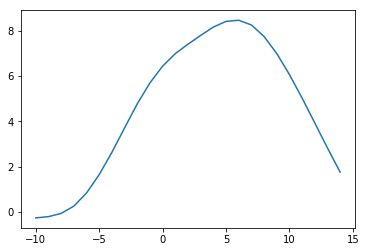

In [79]:
plt.plot(labels, record)

In [ ]:
helix1 = 0 
for i in range(1,6):
    helix1 += results["Lipid" +str(i)]

helix6 = 0
ii = 0
for i in range(5,0,-1):
    ii = ii + i
    print(ii)
    helix6 += results["Lipid" +str(ii)]

helix1 - helix6

In [48]:
all_data_list = []
location_list = ["strengthen_helix_1", "strengthen_helix_1_baseline_without_strengthen"]
pre = "/Users/weilu/Research/server/oct_2017/30oct/"
for location in location_list:
    folder_list = glob.glob(pathname=pre + location + "/*_")
    for folder in folder_list:
        print(folder)
        for i in range(10):
            myLocation = folder + "/simulation/{}/recompute_offset_0/".format(i)
            
            file = "lipid.dat"
            lipid = pd.read_csv(myLocation+file)
            lipid.columns = lipid.columns.str.strip()
            tmp = folder.split("/")[-1]
            _,temp,_,memb,_,rg, _ = tmp.split("_")
            lipid = lipid.assign(Run = i, temp = temp, memb = memb, rg = rg, Location=location)
            all_data_list.append(lipid)
data = pd.concat(all_data_list).reset_index()
tmp = data.query('Location=="strengthen_helix_1_baseline_without_strengthen"').query('Steps < 1e6')
results = tmp.filter(items=["Steps"] +["Lipid"+str(i) for i in range(1,16)]).mean()
helix1 = 0 
for i in range(1,6):
    helix1 += results["Lipid" +str(i)]

helix6 = 0
ii = 0
for i in range(5,0,-1):
    ii = ii + i
    print(ii)
    helix6 += results["Lipid" +str(ii)]

helix1 - helix6

/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_2_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_4_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_2_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_2_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_4_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_4_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_500_memb_2_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1/temp_350_memb_4_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_without_strengthen/temp_350_memb_2_rg_0.1_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_without_strengthen/temp_350_memb_4_rg_0.4_
/Users/weilu/Research/server/oct_2017/30oct/strengthen_helix_1_baseline_wi

1.9499850149169937

In [54]:
tmp = data.query('Location=="strengthen_helix_1_baseline_without_strengthen"').query('Steps < 1e6').query('temp=="350"')
tmp =tmp.query('rg=="0.1"').query('memb=="2"')


results = tmp.filter(items=["Steps"] +["Lipid"+str(i) for i in range(1,16)]).mean()
helix1 = 0 
for i in range(1,6):
    helix1 += results["Lipid" +str(i)]

helix6 = 0
ii = 0
for i in range(5,0,-1):
    ii = ii + i
    print(ii)
    helix6 += results["Lipid" +str(ii)]

helix1 - helix6

5
9
12
14
15


1.6297487072661312

In [55]:
# offset -5
helix1 - helix6

1.6297487072661312

In [47]:
# offset -2
helix1 - helix6

4.932207833357694

In [45]:
# offset -1 
helix1 - helix6

5.8028303110838184

In [43]:
# offset 0
helix1 - helix6

6.321547949765721